In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import scikitplot.metrics as skplt
import joblib

In [2]:
d = {'NAG':0, 'CAG':1, 'OAG':2}

In [3]:
eng_train = pd.read_csv("lda_vecs_en.csv")
whole_data = pd.read_csv("Data/cleaned english.csv")
target = np.array([d[i] for i in whole_data["Sub-task A"]])
X = eng_train.values

In [4]:
from collections import Counter
Counter(target)

Counter({0: 3375, 1: 453, 2: 435})

In [5]:
eng_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.035714,0.035714,0.035714,0.035714,0.035714,0.535712,0.035715,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,9,2
1,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,35,4
2,0.767853,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017858,0.017857,0.017857,0.017857,0.017857,0.017857,25,5
3,0.001661,0.001661,0.086649,0.001661,0.042266,0.001661,0.001661,0.038026,0.163217,0.058207,0.001661,0.001661,0.598345,0.001661,540,83
4,0.007937,0.119051,0.007937,0.123133,0.119957,0.007937,0.007937,0.558491,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,105,15


In [6]:
# for i in range(0,X.shape[-1]):
#     X[:,i] = makeLabelled(X[:,i])

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X, target,test_size=0.25,random_state=0)

In [22]:
clf = GaussianNB(var_smoothing=0.2)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       852
           1       0.17      0.11      0.13       118
           2       0.14      0.08      0.10        96

    accuracy                           0.73      1066
   macro avg       0.37      0.36      0.36      1066
weighted avg       0.68      0.73      0.70      1066

[[752  55  45]
 [ 99  13   6]
 [ 80   8   8]]


In [9]:
clf = SVC(C=1, gamma='auto', kernel='rbf', probability=True)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       852
           1       0.50      0.02      0.03       118
           2       0.00      0.00      0.00        96

    accuracy                           0.80      1066
   macro avg       0.43      0.34      0.31      1066
weighted avg       0.70      0.80      0.71      1066

[[848   2   2]
 [115   2   1]
 [ 96   0   0]]


In [10]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       852
           1       0.22      0.02      0.03       118
           2       0.00      0.00      0.00        96

    accuracy                           0.80      1066
   macro avg       0.34      0.34      0.31      1066
weighted avg       0.67      0.80      0.71      1066

[[847   5   0]
 [116   2   0]
 [ 94   2   0]]


/home/rachit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rachit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
clf = MultinomialNB()
# scaler = MinMaxScaler()
# X_transformed = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, target,test_size=0.25,random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       852
           1       0.42      0.09      0.15       118
           2       0.00      0.00      0.00        96

    accuracy                           0.80      1066
   macro avg       0.41      0.36      0.35      1066
weighted avg       0.69      0.80      0.73      1066

[[843   9   0]
 [107  11   0]
 [ 90   6   0]]


/home/rachit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
def run_the_mn_models(model, X_train, X_test, Y_tr, Y_te):
    X_train_text_df, X_test_text_df, y_train, y_test = X_train, X_test, Y_tr, Y_te
    
    if model == 'mnb1':
        
        mn_params = {
            'fit_prior': [True],
            'alpha': [0, 0.5, 1]}
        
        M = GridSearchCV(MultinomialNB(),
                        mn_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    elif model == 'mnb2':
        
         mn_params = {
            'fit_prior': [False],
            'alpha': [0, 0.5, 1]}
        
         M = GridSearchCV(MultinomialNB(),
                        mn_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    else:
        print('There is an error.')
        
    M.fit(X_train_text_df, y_train)
     
    print(f'Train score = {M.score(X_train_text_df, y_train)}')
    print(f'Test score = {M.score(X_test_text_df, y_test)}')
    
    predictions = M.predict(X_test_text_df)
    predictions_train = M.predict(X_train_text_df)
    print('--------')
    print(skplt.plot_confusion_matrix(y_test, predictions))
    print(f'Best params = {M.best_params_}')
    print('----F1 Score, Recall, Precision----')
    # print precision, recall, F1-score per each class/tag
    print(classification_report(y_test, predictions))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train score = 0.7816703159211761
Test score = 0.801125703564728
--------
AxesSubplot(0.125,0.125;0.62x0.755)
Best params = {'alpha': 0.5, 'fit_prior': True}
----F1 Score, Recall, Precision----
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       852
           1       0.42      0.09      0.15       118
           2       0.00      0.00      0.00        96

    accuracy                           0.80      1066
   macro avg       0.41      0.36      0.35      1066
weighted avg       0.69      0.80      0.73      1066



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
/home/rachit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


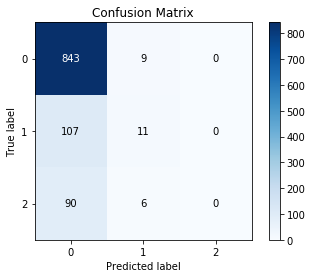

In [36]:
run_the_mn_models("mnb1", X_train, X_test, Y_train, Y_test)

In [37]:

def run_the_lr_models(model, X_train, X_test, Y_tr, Y_te):
    X_train_text_df, X_test_text_df, y_train, y_test = X_train, X_test, Y_tr, Y_te
    
    
    if model == 'lr1':
        
        lr_1_params = {
            'penalty': ['l1'],
            'C': [1, 1.5, 2, 2.5],
            'class_weight': ['balanced'],
            'warm_start': [True, False],
            'random_state': [42],
            'solver': ['liblinear']}
        
        M = GridSearchCV(LogisticRegression(),
                        lr_1_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    elif model == 'lr2':
        
        lr_2_params = {
            'penalty': ['l2'],
            'C': [1, 1.5, 2, 2.5],
            'class_weight': ['balanced'],
            'warm_start': [True, False],            
            'random_state': [42],
            'solver': ['lbfgs', 'liblinear']}
        
        M = GridSearchCV(LogisticRegression(),
                        lr_2_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)

    else:
        print('There is an error.')
        
    M.fit(X_train_text_df, y_train)
     
    print(f'Train score = {M.score(X_train_text_df, y_train)}')
    print(f'Test score = {M.score(X_test_text_df, y_test)}')
    
    predictions = M.predict(X_test_text_df)
    predictions_train = M.predict(X_train_text_df)
    print('--------')
    print(skplt.plot_confusion_matrix(y_test, predictions))
    print(f'Best params = {M.best_params_}')
    print('----F1 Score, Recall, Precision----')
    # print precision, recall, F1-score per each class/tag
    print(classification_report(y_test, predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


Train score = 0.7707225523928684
Test score = 0.7926829268292683
--------
AxesSubplot(0.125,0.125;0.62x0.755)
Best params = {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'warm_start': True}
----F1 Score, Recall, Precision----
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       852
           1       0.36      0.14      0.21       118
           2       0.31      0.05      0.09        96

    accuracy                           0.79      1066
   macro avg       0.50      0.39      0.39      1066
weighted avg       0.72      0.79      0.74      1066



[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.2s finished
/home/rachit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


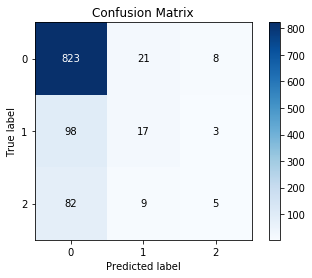

In [39]:
run_the_lr_models("lr2", X_train, X_test, Y_train, Y_test)

In [42]:

def run_the_sv_models(model, X_train, X_test, Y_tr, Y_te):   
    X_train_text_df, X_test_text_df, y_train, y_test = X_train, X_test, Y_tr, Y_te
    
    if model == 'sv1':
        
        sv_params = {
            'kernel': ['rbf'], 
            'gamma': [1e-3, 1e-4],
            'C': [1, 10, 100, 1000] }
        
        M = GridSearchCV(SVC(probability=True),
                        sv_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    elif model == 'sv2':
        
        
        sv_params = {
            'kernel': ['rbf'], 
            'gamma': [0.01, 1, 10, 100],
            'C': [1, 10, 100, 1000] }

        M = GridSearchCV(SVC(probability=True),
                        sv_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    M.fit(X_train_text_df, y_train)
      
    #save in picle file
    joblib.dump(M, "SVM_TFIDF.pkl")
     
    print(f'Train score = {M.score(X_train_text_df, y_train)}')
    print(f'Test score = {M.score(X_test_text_df, y_test)}')
    
    predictions = M.predict(X_test_text_df)
    predictions_train = M.predict(X_train_text_df)
    
    print('--------')
    print(skplt.plot_confusion_matrix(y_test, predictions))
    print(f'Best params = {M.best_params_}')
    print('----F1 Score, Recall, Precision----')
    # print precision, recall, F1-score per each class/tag
    print(classification_report(y_test, predictions))
#     print('----ROC AUC CURVE SCORE----')
#     print("ROC AUC CURVE SCORE FOR TEST: ",roc_auc_score(y_test, predictions))
#     print("ROC AUC CURVE SCORE FOR TRAIN: ",roc_auc_score(y_train, predictions_train))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


Train score = 0.791992492962152
Test score = 0.797373358348968
--------
AxesSubplot(0.125,0.125;0.62x0.755)
Best params = {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
----F1 Score, Recall, Precision----
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       852
           1       0.00      0.00      0.00       118
           2       0.00      0.00      0.00        96

    accuracy                           0.80      1066
   macro avg       0.27      0.33      0.30      1066
weighted avg       0.64      0.80      0.71      1066



/home/rachit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


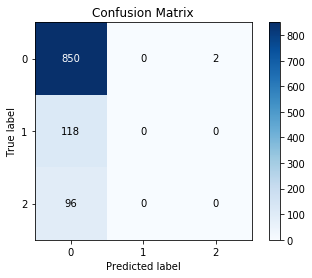

In [45]:
run_the_sv_models("sv1", X_train, X_test, Y_train, Y_test)